In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from sklearn.impute import SimpleImputer


pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_colwidth', 10)

df = pd.read_csv('vgsales_17.csv')
df

,Rank,Name,Platform,Year,Genre,...,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,8861,NHL 09,PS2,2008.0,Sports,...,0.07,0.06,0.00,0.02,0.15
1,16363,Shirah...,PSP,2013.0,Adventure,...,0.00,0.00,0.01,0.00,0.01
2,3476,Gex: E...,PS,1998.0,Platform,...,0.32,0.22,0.00,0.04,0.58
3,7432,Deus E...,PS2,2002.0,Action,...,0.10,0.08,0.00,0.03,0.21
4,501,Call o...,PS2,2004.0,Shooter,...,1.51,1.12,0.01,0.24,2.89
...,...,...,...,...,...,...,...,...,...,...,...
548,5776,Jampac...,PS2,2005.0,Misc,...,0.15,0.12,0.00,0.04,0.31
549,662,Bloodb...,PS4,2015.0,Action,...,1.00,0.76,0.26,0.36,2.38
550,7811,IHRA P...,PS2,2004.0,Racing,...,0.09,0.07,0.00,0.02,0.19
551,2032,Shrek 2,GC,2004.0,Platform,...,0.73,0.26,0.01,0.03,1.02


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 553 entries, 0 to 552
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          553 non-null    int64  
 1   Name          553 non-null    object 
 2   Platform      553 non-null    object 
 3   Year          538 non-null    float64
 4   Genre         553 non-null    object 
 5   Publisher     549 non-null    object 
 6   NA_Sales      553 non-null    float64
 7   EU_Sales      553 non-null    float64
 8   JP_Sales      553 non-null    float64
 9   Other_Sales   553 non-null    float64
 10  Global_Sales  553 non-null    float64
dtypes: float64(6), int64(1), object(4)
memory usage: 47.7+ KB


In [3]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Rank,553.0,NaN,NaN,NaN,8562.549729,4872.12311,16.0,4358.0,8527.0,12843.0,16582.0
Name,553,539,Voodoo Vince,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Platform,553,25,PS2,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,538.0,NaN,NaN,NaN,2006.579926,5.532545,1986.0,2003.0,2007.0,2010.0,2020.0
Genre,553,12,Action,107,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Publisher,549,133,Electronic Arts,44,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NA_Sales,553.0,NaN,NaN,NaN,0.256926,0.780068,0.0,0.0,0.07,0.24,14.97
EU_Sales,553.0,NaN,NaN,NaN,0.154738,0.589817,0.0,0.0,0.02,0.11,9.26
JP_Sales,553.0,NaN,NaN,NaN,0.060217,0.233384,0.0,0.0,0.0,0.03,4.16
Other_Sales,553.0,NaN,NaN,NaN,0.048933,0.158559,0.0,0.0,0.01,0.04,2.05


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rank,553.0,8562.549729,4872.123110,16.00,4358.00,8527.00,12843.00,16582.00
Year,538.0,2006.579926,5.532545,1986.00,2003.00,2007.00,2010.00,2020.00
NA_Sales,553.0,0.256926,0.780068,0.00,0.00,0.07,0.24,14.97
EU_Sales,553.0,0.154738,0.589817,0.00,0.00,0.02,0.11,9.26
JP_Sales,553.0,0.060217,0.233384,0.00,0.00,0.00,0.03,4.16
Other_Sales,553.0,0.048933,0.158559,0.00,0.00,0.01,0.04,2.05
Global_Sales,553.0,0.521157,1.501461,0.01,0.05,0.16,0.45,21.82


In [5]:
print("Общий размер -", df.shape, "Размер по вертикали -", 
      df.shape[0], "Размер по горизонтали -", df.shape[1])

Общий размер - (553, 11) Размер по вертикали - 553 Размер по горизонтали - 11


In [6]:
df.isnull().sum()

Rank             0
Name             0
Platform         0
Year            15
Genre            0
Publisher        4
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
Global_Sales     0
dtype: int64

In [7]:
df.isnull().mean()*100

Rank            0.000000
Name            0.000000
Platform        0.000000
Year            2.712477
Genre           0.000000
Publisher       0.723327
NA_Sales        0.000000
EU_Sales        0.000000
JP_Sales        0.000000
Other_Sales     0.000000
Global_Sales    0.000000
dtype: float64

In [8]:
dfe = df.replace({'Publisher' : np.nan}, '2222')
dfe.isnull().mean()*100

Rank            0.000000
Name            0.000000
Platform        0.000000
Year            2.712477
Genre           0.000000
Publisher       0.000000
NA_Sales        0.000000
EU_Sales        0.000000
JP_Sales        0.000000
Other_Sales     0.000000
Global_Sales    0.000000
dtype: float64

In [9]:
# pd.set_option('display.max_rows', 20)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_colwidth', None)

dff = pd.read_csv('vgsales_17.csv')


simple = SimpleImputer(strategy='mean', missing_values=np.nan)
simple = simple.fit(dff[['Year']])
dff['Year'] = simple.transform(dff[['Year']])
dff.isnull().mean()*100

Rank            0.000000
Name            0.000000
Platform        0.000000
Year            0.000000
Genre           0.000000
Publisher       0.723327
NA_Sales        0.000000
EU_Sales        0.000000
JP_Sales        0.000000
Other_Sales     0.000000
Global_Sales    0.000000
dtype: float64

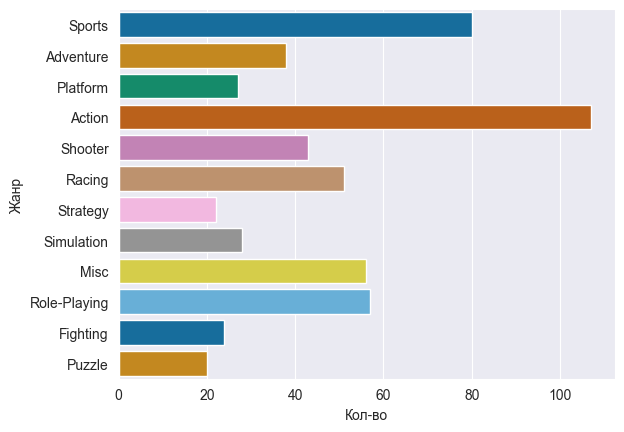

In [10]:
sns.set_style('darkgrid')
sns.countplot(y='Genre',data=df,palette='colorblind')
plt.xlabel('Кол-во')
plt.ylabel('Жанр')
plt.show()

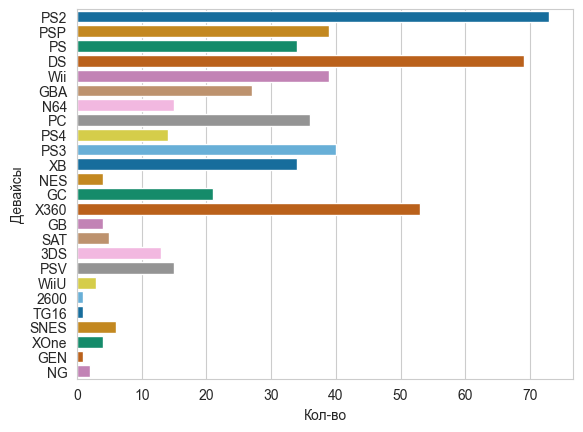

In [11]:
sns.set_style('whitegrid')
sns.countplot(y='Platform',data=df,palette='colorblind')
plt.xlabel("Кол-во")
plt.ylabel("Девайсы")
plt.show() 

In [12]:
action_games = len(df[df['Genre']=='Action'])
sports_games = len(df[df['Genre']=='Sports'])
role_games = len(df[df['Genre']=='Role-Playing'])
other_games = len(df) - action_games - sports_games - role_games
print("КОл-во игр с жанром 'Экшн-Игры' = ", action_games)
print("КОл-во игр с жанром 'Спорт' = ", sports_games)
print("КОл-во игр с жанром 'Ролевые' = ", role_games)
print("Кол-во остальных игр = ", other_games)

КОл-во игр с жанром 'Экшн-Игры' =  107
КОл-во игр с жанром 'Спорт' =  80
КОл-во игр с жанром 'Ролевые' =  57
Кол-во остальных игр =  309


In [13]:
proc = df['Year'].value_counts(normalize=True)
print(proc)
x = df['Year'].unique()
x = x[~np.isnan(x)]
print(x)

2008.0    0.098513
2009.0    0.089219
2004.0    0.076208
2010.0    0.070632
2007.0    0.063197
2011.0    0.061338
2005.0    0.059480
2006.0    0.057621
2002.0    0.055762
2015.0    0.050186
2003.0    0.048327
2014.0    0.046468
1998.0    0.029740
2013.0    0.027881
2012.0    0.026022
2000.0    0.022305
2016.0    0.018587
1995.0    0.018587
2001.0    0.016729
1996.0    0.014870
1997.0    0.013011
1994.0    0.009294
1999.0    0.009294
1991.0    0.003717
1988.0    0.003717
2020.0    0.001859
1986.0    0.001859
1993.0    0.001859
1992.0    0.001859
1989.0    0.001859
Name: Year, dtype: float64
[2008. 2013. 1998. 2002. 2004. 2009. 2007. 2003. 2000. 2005. 2015. 2010.
 2012. 1988. 2011. 1995. 2014. 1991. 2006. 1994. 2001. 2016. 1996. 2020.
 1999. 1997. 1986. 1993. 1992. 1989.]


In [14]:
df[df['Publisher'] == 'Electronic Arts']

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,8861,NHL 09,PS2,2008.0,Sports,Electronic Arts,0.07,0.06,0.00,0.02,0.15
25,14367,F1 2002,GC,2002.0,Racing,Electronic Arts,0.02,0.01,0.00,0.00,0.03
30,11652,Family Game Night 4: The Game Show,X360,2011.0,Misc,Electronic Arts,0.07,0.00,0.00,0.01,0.08
50,6953,NASCAR 08,PS2,2007.0,Racing,Electronic Arts,0.12,0.09,0.00,0.03,0.24
66,1346,NCAA Football 2003,PS2,2002.0,Sports,Electronic Arts,1.16,0.08,0.00,0.19,1.44
78,5116,Madden NFL 11,PSP,2010.0,Sports,Electronic Arts,0.35,0.00,0.00,0.03,0.37
94,13603,NASCAR 07,XB,2006.0,Racing,Electronic Arts,0.03,0.01,0.00,0.00,0.04
107,4344,NHL 2005,PS2,2004.0,Sports,Electronic Arts,0.22,0.17,0.00,0.06,0.45
130,3262,FIFA Soccer,PSV,2012.0,Sports,Electronic Arts,0.17,0.34,0.02,0.09,0.62
166,5995,NBA Live 06,X360,2005.0,Sports,Electronic Arts,0.27,0.00,0.00,0.02,0.29


In [15]:
copy = df.copy()
copy.drop_duplicates()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,8861,NHL 09,PS2,2008.0,Sports,Electronic Arts,0.07,0.06,0.00,0.02,0.15
1,16363,Shirahana no Ori: Hiiro no Kakera 4 - Shiki no Uta,PSP,2013.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01
2,3476,Gex: Enter the Gecko,PS,1998.0,Platform,BMG Interactive Entertainment,0.32,0.22,0.00,0.04,0.58
3,7432,Deus Ex: The Conspiracy,PS2,2002.0,Action,Eidos Interactive,0.10,0.08,0.00,0.03,0.21
4,501,Call of Duty: Finest Hour,PS2,2004.0,Shooter,Activision,1.51,1.12,0.01,0.24,2.89
5,9013,Jurassic: The Hunted,PS2,2009.0,Shooter,Activision,0.07,0.06,0.00,0.02,0.14
6,12809,GRID,DS,NaN,Racing,Codemasters,0.04,0.01,0.00,0.00,0.06
7,5868,Super Robot Taisen OG: Original Generations Gaiden,PS2,2007.0,Strategy,Banpresto,0.00,0.00,0.30,0.00,0.30
8,1880,BeatMania,PS,1998.0,Simulation,Konami Digital Entertainment,0.00,0.00,1.07,0.02,1.09
9,2976,Bakugan: Battle Brawlers,Wii,2009.0,Action,Activision,0.60,0.03,0.00,0.05,0.68


<Axes: >

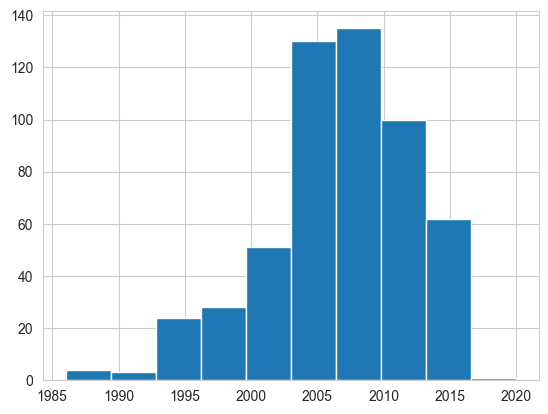

In [16]:
df['Year'].hist()

In [17]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
Rank,8861,16363,3476,7432,501,9013,12809,5868,1880,2976
Name,NHL 09,Shirahana no Ori: Hiiro no Kakera 4 - Shiki no Uta,Gex: Enter the Gecko,Deus Ex: The Conspiracy,Call of Duty: Finest Hour,Jurassic: The Hunted,GRID,Super Robot Taisen OG: Original Generations Gaiden,BeatMania,Bakugan: Battle Brawlers
Platform,PS2,PSP,PS,PS2,PS2,PS2,DS,PS2,PS,Wii
Year,2008.0,2013.0,1998.0,2002.0,2004.0,2009.0,NaN,2007.0,1998.0,2009.0
Genre,Sports,Adventure,Platform,Action,Shooter,Shooter,Racing,Strategy,Simulation,Action
Publisher,Electronic Arts,Idea Factory,BMG Interactive Entertainment,Eidos Interactive,Activision,Activision,Codemasters,Banpresto,Konami Digital Entertainment,Activision
NA_Sales,0.07,0.0,0.32,0.1,1.51,0.07,0.04,0.0,0.0,0.6
EU_Sales,0.06,0.0,0.22,0.08,1.12,0.06,0.01,0.0,0.0,0.03
JP_Sales,0.0,0.01,0.0,0.0,0.01,0.0,0.0,0.3,1.07,0.0
Other_Sales,0.02,0.0,0.04,0.03,0.24,0.02,0.0,0.0,0.02,0.05


In [18]:
df.tail(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
543,2722,Dark Souls II,X360,2014.0,Role-Playing,Namco Bandai Games,0.48,0.20,0.01,0.06,0.76
544,13701,Gitaroo Man Lives!,PSP,2006.0,Misc,Tecmo Koei,0.03,0.00,0.00,0.00,0.04
545,10844,Raven Squad: Operation Hidden Dagger,X360,2009.0,Shooter,Evolved Games,0.08,0.01,0.00,0.01,0.09
546,9127,Project V6,PS,1998.0,Strategy,General Entertainment,0.00,0.00,0.13,0.01,0.14
547,4378,Hot Wheels: Stunt Track Challenge,GBA,2004.0,Racing,THQ,0.32,0.12,0.00,0.01,0.45
548,5776,Jampack Volume 12,PS2,2005.0,Misc,Sony Computer Entertainment,0.15,0.12,0.00,0.04,0.31
549,662,Bloodborne,PS4,2015.0,Action,Sony Computer Entertainment,1.00,0.76,0.26,0.36,2.38
550,7811,IHRA Professional Drag Racing 2005,PS2,2004.0,Racing,Bethesda Softworks,0.09,0.07,0.00,0.02,0.19
551,2032,Shrek 2,GC,2004.0,Platform,Activision,0.73,0.26,0.01,0.03,1.02
552,9577,Spartan: Total Warrior,XB,2005.0,Action,Sega,0.10,0.03,0.00,0.00,0.13


In [19]:
dfa = df.drop(columns=['JP_Sales'])
dfa.head(25)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,Other_Sales,Global_Sales
0,8861,NHL 09,PS2,2008.0,Sports,Electronic Arts,0.07,0.06,0.02,0.15
1,16363,Shirahana no Ori: Hiiro no Kakera 4 - Shiki no Uta,PSP,2013.0,Adventure,Idea Factory,0.00,0.00,0.00,0.01
2,3476,Gex: Enter the Gecko,PS,1998.0,Platform,BMG Interactive Entertainment,0.32,0.22,0.04,0.58
3,7432,Deus Ex: The Conspiracy,PS2,2002.0,Action,Eidos Interactive,0.10,0.08,0.03,0.21
4,501,Call of Duty: Finest Hour,PS2,2004.0,Shooter,Activision,1.51,1.12,0.24,2.89
5,9013,Jurassic: The Hunted,PS2,2009.0,Shooter,Activision,0.07,0.06,0.02,0.14
6,12809,GRID,DS,NaN,Racing,Codemasters,0.04,0.01,0.00,0.06
7,5868,Super Robot Taisen OG: Original Generations Gaiden,PS2,2007.0,Strategy,Banpresto,0.00,0.00,0.00,0.30
8,1880,BeatMania,PS,1998.0,Simulation,Konami Digital Entertainment,0.00,0.00,0.02,1.09
9,2976,Bakugan: Battle Brawlers,Wii,2009.0,Action,Activision,0.60,0.03,0.05,0.68


In [20]:
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_colwidth', 10)
df.sort_values(by='Rank', ascending=True)

,Rank,Name,Platform,Year,Genre,...,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
42,16,Kinect...,X360,2010.0,Misc,...,14.97,4.94,0.24,1.67,21.82
332,20,Brain ...,DS,2005.0,Misc,...,4.75,9.26,4.16,2.05,20.22
427,93,Star W...,PS4,2015.0,Shooter,...,2.93,3.29,0.22,1.23,7.67
417,116,Unchar...,PS3,2011.0,Action,...,2.77,2.80,0.19,1.06,6.83
112,138,World ...,PC,2004.0,Role-P...,...,0.07,6.21,0.00,0.00,6.28
...,...,...,...,...,...,...,...,...,...,...,...
299,16438,Getsue...,PSV,2013.0,Adventure,...,0.00,0.00,0.01,0.00,0.01
19,16448,Wade H...,GBA,2004.0,Sports,...,0.01,0.00,0.00,0.00,0.01
142,16497,Legend...,3DS,2014.0,Puzzle,...,0.00,0.01,0.00,0.00,0.01
351,16533,Sébast...,XOne,2016.0,Racing,...,0.00,0.01,0.00,0.00,0.01


In [22]:
df.to_csv('df.csv')
dfa.to_csv('dfa.csv')
dfe.to_csv('dfe.csv')
dff.to_csv('dff.csv')